# Import Libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Read file using pandas.

# View sample data

In [91]:
# Your code to read the dataset
df = pd.read_csv('hazelnut-2.csv') 

# Your code to Print sample dataset
df.head()

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content,variety
0,71,11.67,12.8025,8.055075,34.65,1375.50,0.93005,19.145,4.4604,0.048668,0.175,c_avellana
1,72,13.86,13.0995,7.349907,38.10,1439.55,0.93401,8.780,4.7844,0.048826,0.167,c_avellana
2,1,20.53,15.5925,9.565427,49.89,1623.30,0.96217,5.120,5.2893,0.049521,0.174,c_americana
3,73,14.13,12.2220,7.182949,35.43,1412.25,0.90178,13.694,4.8168,0.049595,0.167,c_avellana
4,2,15.85,14.7240,8.622661,43.29,1512.00,0.96261,10.925,4.6296,0.050384,0.173,c_americana


# Print the shape of the pandas dataframe

In [92]:
# Print the shape of the dataframe
df.shape

(201, 12)

# Separate the dataframe into input matrix X and output vector y

In [93]:
X = df.drop('variety',axis=1).values
y = df['variety'].values

# Import the SKlearn methods

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


# Split the data into train and test sets - X_train, X_test, y_train, y_test.

# Use test size of 40%.

## Hint: Use Sklearn function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [95]:
# Your code to separate train and test sixe.
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.5, random_state = 42)

# Your code to Print the shapes of the X_train, X_test, y_train, y_test
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(100, 11)
(101, 11)
(100,)
(101,)


# Scale the dataset between 0-1.

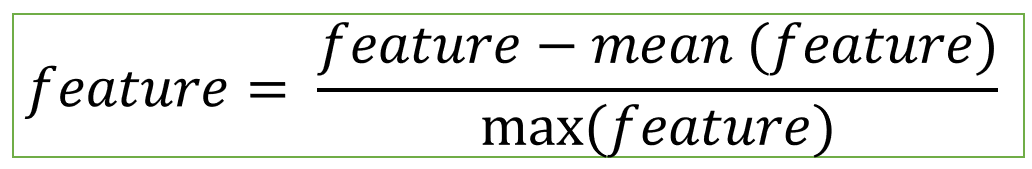

In [96]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement Knn classifer using sklearn.

# Use number of neigbours as 3.

In [97]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Make predictions on the test sample X_test.

# Print predicted values.

# Print actual test values.

# Are predicted and actual values are equal?

In [98]:
y_pred = knn.predict(X_test)
print (y_pred)
print (y_test)

['c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_americana' 'c_avellana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta' 'c_americana'
 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana' 'c_americana'
 'c_americana' 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana'
 'c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_avellana'
 'c_

# Print accuracy for training and test set.

In [99]:
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

0.98
0.9405940594059405


# Print Classification report - Precision, Recall, and F-score.

In [100]:
print (classification_report(y_test, y_pred))

print (print("Validation Accuracy: ", accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

 c_americana       0.93      0.97      0.95        38
  c_avellana       0.94      0.92      0.93        36
   c_cornuta       0.96      0.93      0.94        27

    accuracy                           0.94       101
   macro avg       0.94      0.94      0.94       101
weighted avg       0.94      0.94      0.94       101

Validation Accuracy:  0.9405940594059405
None


# Display Confusion Matrix

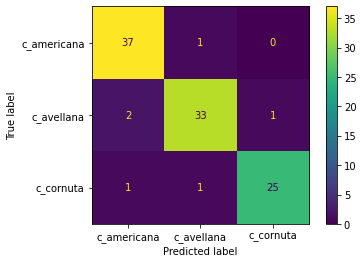

In [101]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

# Till now, we implemented the KNN for number of neigbours 3.
# Now, we will check the accuracy for number of neighbours 1- 10 - all values, and will plot accuracy.

In [102]:
# Your code to create an empty list train_scores
train_scores = []
# Your code to create an empty list test_scores
test_scores = []
# Your code to create a list neighbours having values [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. You can create numpy array and use np.arange function.
neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
##for ##...... in #.......: # Your code to fill in the for loop.
  # Create a knn classifier object for particular neigbour value.
  # Fit the classifier on X_train, y_train
  # Make predictions on train data.  Store the values in train_pred variable.
  # Make predictions on test data.  Store the values in test_pred variable.
  # Find accuracy for train data. Hint - use accuracy_score method in sklearn.
  # Find accuracy for test data. Hint - use accuracy_score method in sklearn.
  # Append training accuracy in list train_scores.
  # Append test accuracy in list test-scores.
for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors= neighbour)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    train_scores.append(train_score)
    test_scores.append(test_score)




# Plot the accuracy for number of neigbours 1-10.

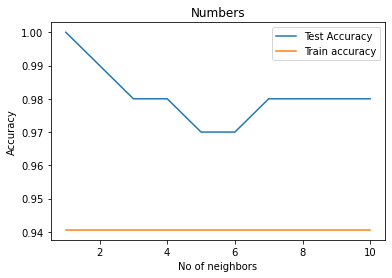

In [103]:
#
# Your code to plot neigbours vs train scores. Proivide label name as the 'train accuracy'

# Your code to plot neigbours vs test scores. Provide label bame as the 'test accuracy'.
#

plt.title('Numbers')    
plt.plot(neighbours, train_scores, label='Test Accuracy')
plt.plot(neighbours, test_scores, label='Train accuracy')
plt.legend()
plt.xlabel('No of neighbors')
plt.ylabel('Accuracy')
plt.show()

# Let's implement other ML algorithm that we studied -  Logistic Regression and MLP.

# We will do the same task using Logistic Regression and MLP.

## Implement Logistic Regression and MLP for the same problem and compare accuracy of the three classifiers using Bar plot:


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


In [104]:
#
# Your code to implement Logistic regression and MLP based classifier.
# You could split this code into multiple cells
#
test_scores_models =[]
test_scores_models.append(test_scores[5])

# **Important** -  Lab logbook requirement:
# Put bar plot comparing the accracy of three models in you lablogbook.

In [105]:
logisticRegression =  LogisticRegression(random_state = 42)

logisticRegression.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [106]:
y_pred = logisticRegression.predict(X_test)
print (y_pred)

['c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_americana' 'c_avellana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta' 'c_americana'
 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana' 'c_americana'
 'c_americana' 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana'
 'c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_avellana'
 'c_co

In [107]:
test_scores_models.append(logisticRegression.score(X_test, y_test))

In [108]:
print (classification_report(y_test, y_pred))

print("Validation Accuracy: ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

 c_americana       0.95      0.97      0.96        38
  c_avellana       0.94      0.92      0.93        36
   c_cornuta       0.96      0.96      0.96        27

    accuracy                           0.95       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.95      0.95      0.95       101

Validation Accuracy:  0.9504950495049505


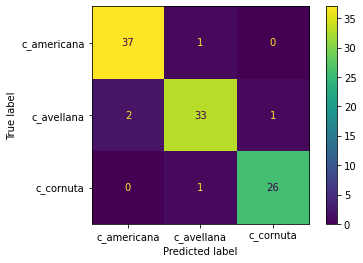

In [109]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisticRegression.classes_)
disp.plot()
plt.show()

In [110]:
MLP =  MLPClassifier(random_state=42, 
                     max_iter=350,        
                     verbose=True)

MLP.fit(X_train, y_train)

Iteration 1, loss = 1.32640408
Iteration 2, loss = 1.27571737
Iteration 3, loss = 1.22660142
Iteration 4, loss = 1.17909399
Iteration 5, loss = 1.13317497
Iteration 6, loss = 1.08901220
Iteration 7, loss = 1.04663617
Iteration 8, loss = 1.00602413
Iteration 9, loss = 0.96702917
Iteration 10, loss = 0.92964169
Iteration 11, loss = 0.89393287
Iteration 12, loss = 0.85986848
Iteration 13, loss = 0.82743818
Iteration 14, loss = 0.79646387
Iteration 15, loss = 0.76693019
Iteration 16, loss = 0.73886650
Iteration 17, loss = 0.71209878
Iteration 18, loss = 0.68666045
Iteration 19, loss = 0.66247414
Iteration 20, loss = 0.63947139
Iteration 21, loss = 0.61763154
Iteration 22, loss = 0.59689012
Iteration 23, loss = 0.57715904
Iteration 24, loss = 0.55839268
Iteration 25, loss = 0.54055273
Iteration 26, loss = 0.52359064
Iteration 27, loss = 0.50739165
Iteration 28, loss = 0.49194962
Iteration 29, loss = 0.47722619
Iteration 30, loss = 0.46318554
Iteration 31, loss = 0.44975078
Iteration 32, los

Iteration 274, loss = 0.02324206
Iteration 275, loss = 0.02309677
Iteration 276, loss = 0.02295279
Iteration 277, loss = 0.02281009
Iteration 278, loss = 0.02266870
Iteration 279, loss = 0.02252860
Iteration 280, loss = 0.02238974
Iteration 281, loss = 0.02225236
Iteration 282, loss = 0.02211604
Iteration 283, loss = 0.02198070
Iteration 284, loss = 0.02184698
Iteration 285, loss = 0.02171434
Iteration 286, loss = 0.02158284
Iteration 287, loss = 0.02145257
Iteration 288, loss = 0.02132376
Iteration 289, loss = 0.02119570
Iteration 290, loss = 0.02106889
Iteration 291, loss = 0.02094315
Iteration 292, loss = 0.02081866
Iteration 293, loss = 0.02069542
Iteration 294, loss = 0.02057322
Iteration 295, loss = 0.02045210
Iteration 296, loss = 0.02033199
Iteration 297, loss = 0.02021293
Iteration 298, loss = 0.02009508
Iteration 299, loss = 0.01997825
Iteration 300, loss = 0.01986225
Iteration 301, loss = 0.01974710
Iteration 302, loss = 0.01963325
Iteration 303, loss = 0.01952040
Iteration 

MLPClassifier(max_iter=350, random_state=42, verbose=True)

In [111]:
test_scores_models.append(MLP.score(X_test, y_test))

In [112]:
print (classification_report(y_test, y_pred))

print("Validation Accuracy: ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

 c_americana       0.95      0.97      0.96        38
  c_avellana       0.94      0.92      0.93        36
   c_cornuta       0.96      0.96      0.96        27

    accuracy                           0.95       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.95      0.95      0.95       101

Validation Accuracy:  0.9504950495049505


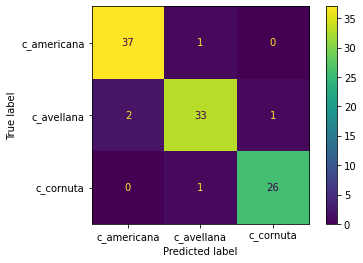

In [113]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisticRegression.classes_)
disp.plot()
plt.show()

In [114]:
test_scores_models

[0.9405940594059405, 0.9504950495049505, 0.9504950495049505]

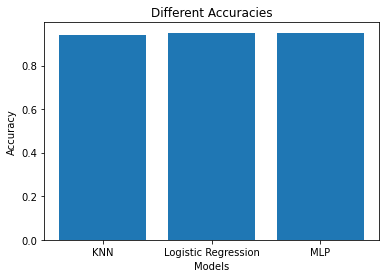

In [116]:
models=['KNN', 'Logistic Regression' , 'MLP']
 
plt.bar(models, test_scores_models)

plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.title('Different Accuracies')
plt.show()